# **Sentiment Analysis using VADER Lexicon**

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd


In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Syed
[nltk_data]     Asad\AppData\Roaming\nltk_data...


True

In [5]:
file_path = r"C:\Users\Syed Asad\OneDrive\Desktop\Python Files\NLP\Sentiment Analysis.csv"
data = pd.read_csv(file_path)
data

,Comment
0,This is at par with the compositions at the 'C...
1,Lovely rendition of one of my favorite poems.
2,Best and soothing voice ??????
3,Very bad voice
4,frustrated after hearing such song


In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
# Create an empty list to store sentiment scores
sentiment_scores = []

# Iterate through comments and perform sentiment analysis
for comment in data['Comment']:
    # Perform sentiment analysis
    scores = analyzer.polarity_scores(comment)
    # Store the 'compound' score in the list
    sentiment_scores.append(scores['compound'])

# Add the sentiment scores as a new column to the DataFrame
data['Sentiment_Score'] = sentiment_scores

In [8]:
sentiment_scores

[0.0, 0.7783, 0.8156, -0.5849, -0.5267]

In [18]:
data

,Comment,Sentiment_Score
0,This is at par with the compositions at the 'C...,0.0000
1,Lovely rendition of one of my favorite poems.,0.7783
2,Best and soothing voice ??????,0.8156
3,Very bad voice,-0.5849
4,frustrated after hearing such song,-0.5267


In [19]:
# Save the updated DataFrame to a new CSV file
data.to_csv(r"C:\Users\Syed Asad\OneDrive\Desktop\Python Files\NLP\SentimentAnalysisFinal.csv", index=False)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

**Scatter Plot Using Seaborn**

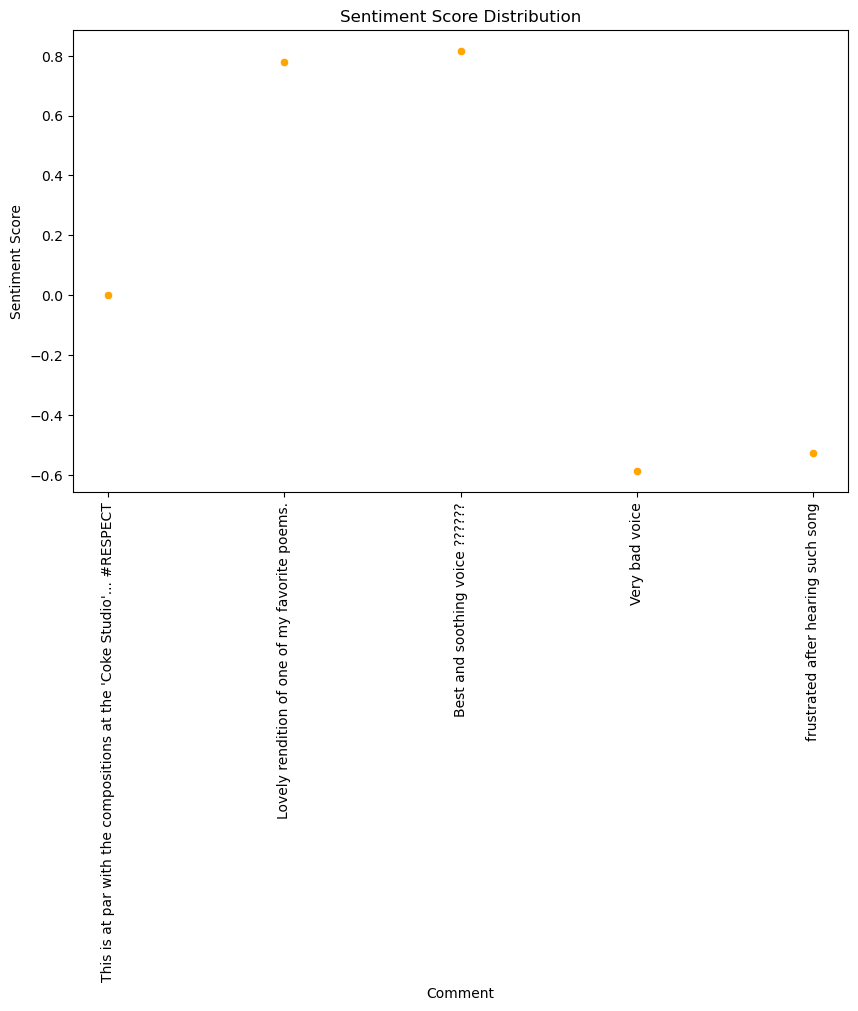

In [25]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Comment', y='Sentiment_Score', color='orange')
plt.title("Sentiment Score Distribution")
plt.xlabel("Comment")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=90)
plt.show()

**Heat Map using Seaborn**

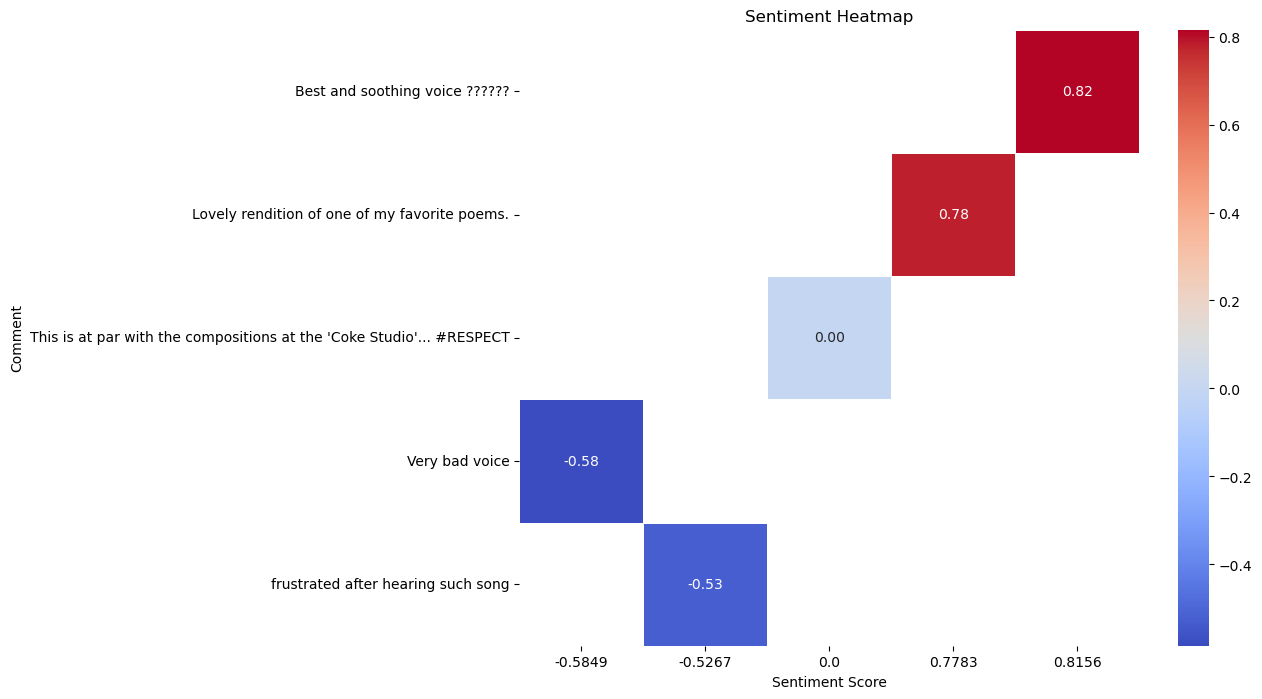

In [26]:
# Pivot the DataFrame to have comments as columns and sentiments as rows
pivoted_data = data.pivot(index='Comment', columns='Sentiment_Score', values='Sentiment_Score')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivoted_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Sentiment Heatmap")
plt.xlabel("Sentiment Score")
plt.ylabel("Comment")
plt.show()